In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


pybullet build time: Apr  3 2024 21:51:03


argv[0]=
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=3
argv[0] = --unused
argv[1] = 
argv[2] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 3070 Ti/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 550.67
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 550.67
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 3070 Ti/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = NVIDIA Corporation
ven = NVIDIA Corporation
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: expected a wo

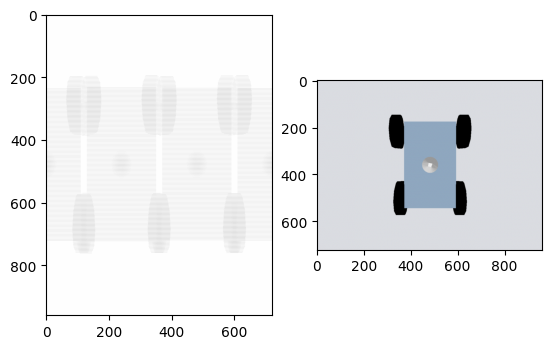

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import torch
import agents
import time
from envs import StaticTrackEnv

env = StaticTrackEnv(render_mode="fp_camera")

env.reset()

width = 960
height = 720

fov = 60
aspect = width / height
near = 0.02
far = 1

view_matrix = env._p.computeViewMatrix([0, 0, 1], [0, 0, 0], [.5, 0, 0])
projection_matrix = env._p.computeProjectionMatrixFOV(fov, aspect, near, far)

# Get depth values using the OpenGL renderer
images = env._p.getCameraImage(
    width,
    height,
    view_matrix,
    projection_matrix,
)
# NOTE: the ordering of height and width change based on the conversion
rgb_opengl = np.reshape(images[2], (height, width, 4)) * 1.0 / 255.0
depth_buffer_opengl = np.reshape(images[3], [width, height])
depth_opengl = far * near / (far - (far - near) * depth_buffer_opengl)
seg_opengl = np.reshape(images[4], [width, height]) * 1.0 / 255.0
# time.sleep(1)

plt.subplot(1, 2, 1)
plt.imshow(depth_opengl, cmap="gray", vmin=0, vmax=1)

plt.subplot(1, 2, 2)
plt.imshow(rgb_opengl)

plt.show()